In [1]:
from create_setpoints_class import *

In [2]:
# initialize the object
D = create_FEHM_run('test1','param_file.csv')

In [3]:
D.dz

333.3333333333333

In [4]:
# build surfaces based on grid
D.build_surfaces_real('testy_test.dat')

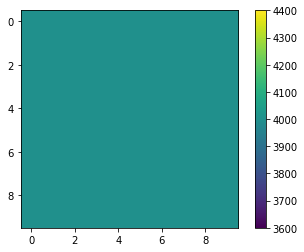

In [5]:
# plot upper and lower surfaces
D.plot_upper_surface()

In [6]:
# save the csv file with coordinates
D.save_coords_csv()

In [7]:
# test reading the boundary file
D.read_boundary_file('QCF_line.bln')

In [8]:
# test making the zone files
D.build_zones()

/mnt/c/Users/rperrin/OneDrive - University of Calgary/Geofluids/FEHM_tests/testing_column/create_setpoints_class.py:203: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self.DF.upp_surf[index] = self.fsurf(self.DF.x[index].copy(),self.DF.y[index].copy())
/mnt/c/Users/rperrin/OneDrive - University of Calgary/Geofluids/FEHM_tests/testing_column/create_setpoints_class.py:220: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self.DF.mat_zone[self.DF.x[:].copy() > self.DF.x_boun[:].copy()] = 3  # setting continental crust
/mnt/c/Users/rperrin/OneDrive - University of Calgary/Geofluids/FEHM_tests/testing_column/create_setpoints_c

### variable material properties in the sediment column
This section builds the prototype for populating the sediment column with variable porosity and corresponding thermal conductivity.

In [9]:
# open a mat properties file
# mat_properties_filename = 'mat_properties_test.prop'
# PZ = open(mat_properties_filename,'w+')

# # open a conductivity file
# mat_cond_filename = 'mat_cond_test.cond'
# CZ = open(mat_cond_filename,'w+')

# # populate the file yo!
# rock_density = 2500
# rock_spec_heat = 2000
# aquifer_porosity = 0.3
# basement_porosity = 0.3
# solids_cond = 2
# water_cond = 0.604
# basement_cond = 2
# aquifer_cond = 2

# PZ.write('rock\n')
# CZ.write('cond\n')
# for x in D.node_nums_upper:
#     temp_depth = D.max_z - D.ZZ_out[x-1]
#     temp_porosity = 0.7136*np.exp(-0.3714*temp_depth/1000)
#     temp_cond = solids_cond**(1 - temp_porosity) * water_cond**(temp_porosity)
#     PZ.write('  %d  %d  1  %d  %d  %.1f\n' % (x,x,rock_density,rock_spec_heat,temp_porosity))
#     CZ.write('  %d  %d  1  %.2f  %.2f  %.2f\n' % (x,x,temp_cond,temp_cond,temp_cond))
# for x in D.node_nums_middle_ocean:
#     PZ.write('  %d  %d  1  %d  %d  %.1f\n' % (x,x,rock_density,rock_spec_heat,aquifer_porosity))
#     CZ.write('  %d  %d  1  %.2f  %.2f  %.2f\n' % (x,x,aquifer_cond,aquifer_cond,aquifer_cond))
# for x in D.node_nums_middle_continental:
#     PZ.write('  %d  %d  1  %d  %d  %.1f\n' % (x,x,rock_density,rock_spec_heat,aquifer_porosity))
#     CZ.write('  %d  %d  1  %.2f  %.2f  %.2f\n' % (x,x,aquifer_cond,aquifer_cond,aquifer_cond))
# for x in D.node_nums_bottom:
#     PZ.write('  %d  %d  1  %d  %d  %.1f\n' % (x,x,rock_density,rock_spec_heat,basement_porosity))
#     CZ.write('  %d  %d  1  %.2f  %.2f  %.2f\n' % (x,x,basement_cond,basement_cond,basement_cond))
# PZ.write('\nstop')
# PZ.close()
# CZ.write('\nstop')
# CZ.close()

In [10]:
D.build_mat_prop_files(0.7136,-0.3714)

### build the prototype for varying heat flow
This will vary the heat flow across the domain based on age

In [11]:
# bring in age grid - colocated with the surface grid

In [12]:
# test running lagrit
D.lagrit_exec_filename='/mnt/c/Users/rperrin/Programs/LaGriT/src/lagrit'
D.run_lagrit()

 
 
*               * * * * * * * * * * * * * * * * * * * * * * * *                 
*               *                                             *                 
*               *    Program:  LaGriT V3.320   Linux          *                 
*               *    date_compile: 2021/09/26 Release         *                 
*               *    Run Time: 2021/Nov 13  12:44:34          *                 
*               *    Manual:   http://lagrit.lanl.gov         *                 
*               *                                             *                 
*               * * * * * * * * * * * * * * * * * * * * * * * *                 
 
                               -----oOo-----                                    
             LaGriT V3 LA-CC-15-069  https://github.com/lanl/LaGriT             
  Copyright 2016. Triad National Security, LLC.  All rights reserved. This      
  program was produced under U.S. Government contract 89233218CNA000001         
  for Los Alamos Natio

/usr/local/lib/python3.8/dist-packages/pylagrit-1.0.1-py3.8.egg/pylagrit/pylagrit.py:130: LaGriT_Warning: WARNING: itp1 not set for this mesh - use resetpts/itp                          


In [13]:
# test creating input and control files
D.write_input_file()
D.write_control_file()